In [8]:
import torch
import numpy
from glob import glob
from tqdm.auto import tqdm
import pickle

checkpoint_paths = sorted(glob('model/third_party/avr_net/checkpoints/*.*'))

def save_scores(scores):
	with open('losses_data.pckl', 'wb') as file:
		pickle.dump(scores, file)

def load_scores():
	try:
		with open('losses_data.pckl', 'rb') as file:
			return pickle.load(file)
	except:
		return []

In [9]:
from model.avd.train_avd_predictor import train_avd_predictor as score
import argparse

args = argparse.ArgumentParser().parse_args([])
args.video_ids = '2XeFK-DTSZk_01,2XeFK-DTSZk_02,2XeFK-DTSZk_03,55Ihr6uVIDA_01,55Ihr6uVIDA_02,55Ihr6uVIDA_03,914yZXz-iRs_01,914yZXz-iRs_02,914yZXz-iRs_03,QCLQYnt3aMo_01,QCLQYnt3aMo_02,QCLQYnt3aMo_03,fD6VkIRlIRI_01,fD6VkIRlIRI_02,fD6VkIRlIRI_03,iK4Y-JKRRAc_01,iK4Y-JKRRAc_02,iK4Y-JKRRAc_03,o4xQ-BEa3Ss_01,o4xQ-BEa3Ss_02,o4xQ-BEa3Ss_03,oD_wxyTHJ2I_01,oD_wxyTHJ2I_02,oD_wxyTHJ2I_03,rUYsoIIE37A_01,rUYsoIIE37A_02,rUYsoIIE37A_03,tt0t_a1EDCE_01,tt0t_a1EDCE_02,tt0t_a1EDCE_03,u1ltv6r14KQ_01,u1ltv6r14KQ_02,u1ltv6r14KQ_03,uPJPNPbWMFk_01,uPJPNPbWMFk_02,uPJPNPbWMFk_03,xmqSaQPzL1E_01,xmqSaQPzL1E_02,xmqSaQPzL1E_03,yMtGmGa8KZ0_01,yMtGmGa8KZ0_02,yMtGmGa8KZ0_03,8aMv-ZGD4ic_01,8aMv-ZGD4ic_02,8aMv-ZGD4ic_03,Hi8QeP_VPu0_01,Hi8QeP_VPu0_02,Hi8QeP_VPu0_03,PNZQ2UJfyQE_01,PNZQ2UJfyQE_02,PNZQ2UJfyQE_03,tjqCzVjojCo_01,tjqCzVjojCo_02,tjqCzVjojCo_03'
args.val_video_ids = args.video_ids
args.videos_path = 'dataset/videos'
args.waves_path = 'dataset/waves/dihard18'
args.labs_path = 'dataset/vad/ground_truth/predictions'
args.frames_path = 'dataset/asd/ground_truth/aligned_tracklets'
args.track_paths = 'dataset/asd/ground_truth/predictions'
args.rttms_path = ''
args.sys_path = 'dataset/avd/avr_net'
args.data_type = 'val'
args.val_data_type = 'val'
args.denoiser = 'dihard18'
args.vad_detector = 'ground_truth'
args.asd_detector = 'ground_truth'
args.avd_detector = 'avr_net'
args.aligned = True

scores = load_scores()
# for path in tqdm(checkpoint_paths):
# 	args.weights_path = path

# 	scores.append(score(args))
# 	save_scores(scores)

In [10]:
epochs = []
losses = []
for path in tqdm(checkpoint_paths):
	checkpoint = torch.load(path)
	loss = [tensor.cpu().detach().numpy()[0] for tensor in checkpoint['losses']]
	loss = sum(loss) / len(loss)

	epochs.append(checkpoint['epoch'])
	losses.append(loss)

  0%|          | 0/164 [00:00<?, ?it/s]

In [ ]:
import pickle

with open('losses_data.pckl', 'wb') as file:
	pickle.dump(scores, file)

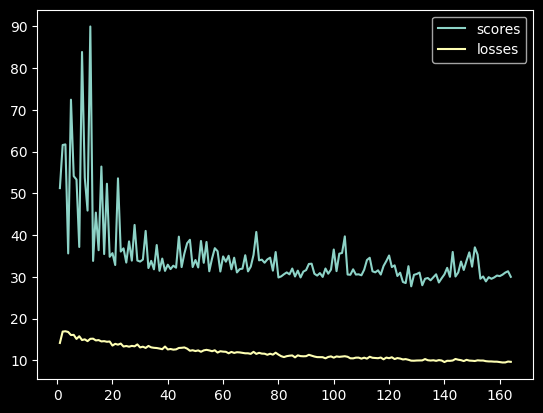

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, scores, label = "scores")
plt.plot(epochs, losses, label = "losses")
plt.legend()